In [2]:
#%%
import math
import numpy as np 
import pandas as pd 
import datetime as dt 

import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr 


In [3]:
class US_Treasury_Note():

    def __init__(self,start,end):
        self.start = start 
        self.end = end 
    
    def get_prcie_df(self,maturity):
        if maturity == 10 :
            ticker = "^TNX"
        elif maturity == 30 :
            ticker = "^TYX"
        elif maturity == 5 :
            ticker = "^FVX"
        elif maturity == "13 weeks" :
            ticker = "^IRX"
        
        self.df = pdr.get_data_yahoo(ticker,self.start,self.end)
        
        return self.df
    
    def price_data(self):
        return self.df['Close'].values
    
    def current_yield_curve(self,plot=None):
        
        df_30 = pdr.get_data_yahoo("^TYX",self.start,dt.datetime.now() )['Close'].values[-1]
        df_10 = pdr.get_data_yahoo("^TNX",self.start,dt.datetime.now() )['Close'].values[-1]
        df_5  = pdr.get_data_yahoo("^FVX",self.start,dt.datetime.now() )['Close'].values[-1]
        df_short = pdr.get_data_yahoo("^IRX",self.start,dt.datetime.now())['Close'].values[-1]

        yield_value = [df_short,df_5,df_10,df_30]
        x_index = ["13-weeks" , "5-year","10-year","30-year"]

        if plot==True :

            fig,ax = plt.subplots()
            ax.plot(x_index,yield_value,label='T-Bill Rates')
            plt.title("Yield Curve")
            ax.scatter(x_index,yield_value,marker='o',color='r')
            plt.ylabel("current yield")
            plt.xlabel("time")
            plt.grid()
            plt.legend()
            plt.show()

            return yield_value , fig
        
        return yield_value

    
    def history_yield_spread(self,plot=None):

        df_10 = pdr.get_data_yahoo("^TNX",self.start,self.end)['Close']
        df_short = pdr.get_data_yahoo("^IRX",self.start,self.end)['Close']

        self.yield_spread = df_10 - df_short

        if plot==True :
            fig,ax = plt.subplots()
            plt.title("History Yield Spread")
            ax.plot(self.yield_spread,label='Spread ( 10 years - 13 weeks )')
            plt.axhline(0,color="r")
            plt.ylabel("spread(%)")
            plt.xlabel("time")
            plt.legend()
            plt.grid()
            plt.show()

            return self.yield_spread , fig

        return self.yield_spread
    

             High    Low   Open  Close  Volume  Adj Close
Date                                                     
1999-12-31  6.440  6.377  6.377  6.435     0.0      6.435
2000-01-03  6.603  6.498  6.498  6.548     0.0      6.548
2000-01-04  6.548  6.485  6.530  6.485     0.0      6.485
2000-01-05  6.599  6.508  6.521  6.599     0.0      6.599
2000-01-06  6.585  6.540  6.558  6.549     0.0      6.549
...           ...    ...    ...    ...     ...        ...
2020-12-23  0.973  0.918  0.920  0.955     0.0      0.955
2020-12-28  0.958  0.931  0.953  0.933     0.0      0.933
2020-12-29  0.950  0.928  0.950  0.935     0.0      0.935
2020-12-30  0.945  0.925  0.943  0.926     0.0      0.926
2020-12-31  0.937  0.912  0.927  0.917     0.0      0.917

[5245 rows x 6 columns]


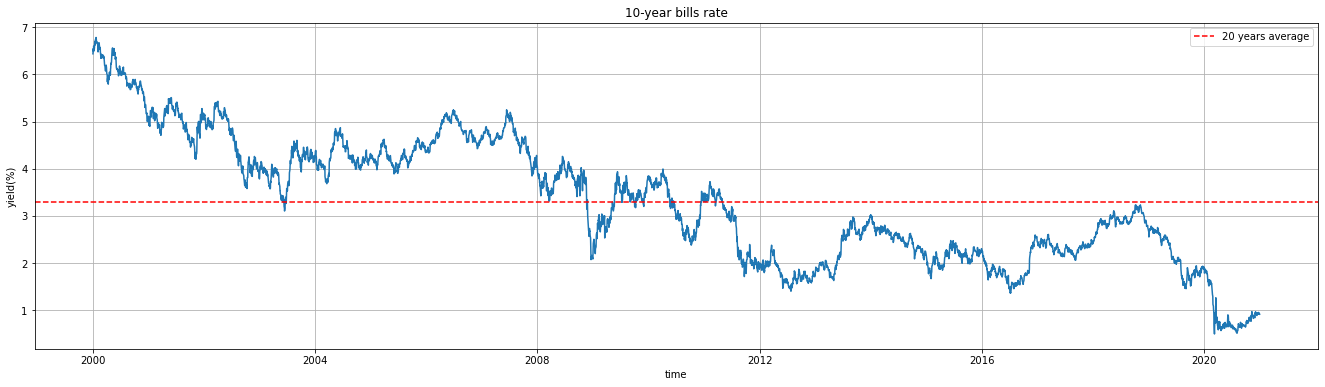

In [5]:

US_10 = US_Treasury_Note(start=dt.datetime(2000,1,1),end=dt.datetime(2021,1,1))
US_10_df = US_10.get_prcie_df(maturity=10)
print(US_10_df)

fig,ax = plt.subplots(figsize=(23,6))
ax.set_title("10-year bills rate")
ax.plot(US_10_df['Close'])
ax.axhline(US_10_df['Close'].mean(),label='20 years average',color='red',linestyle='--')
plt.ylabel("yield(%)")
plt.xlabel("time")
plt.grid()
plt.legend()
plt.show()
